In [30]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read in the CSV files and create dataframes, dropping rows with missing values and resetting index
dfs = {}
x_values = {}
y_values = {}
t_values = {}
velocity_values = {}

participant_numbers = [] # Initialize a list to store participant numbers


# Add participants with ADHD to dfs dictionary
i_start_adhd = 1
i_stop_adhd = 29

for i in range(i_start_adhd, i_stop_adhd):
    csv_file = 'data{}.csv'.format(i)
    df_name = 'df{}'.format(i)
    dfs[df_name] = pd.read_csv(csv_file).dropna().reset_index(drop=True)
    x_name = 'x{}'.format(i)
    y_name = 'y{}'.format(i)
    t_name = 't{}'.format(i)
    v_name = 'v{}'.format(i)
    x_values[x_name] = dfs[df_name]['Position_1'].values
    y_values[y_name] = dfs[df_name]['Position_2'].values
    t_values[t_name] = dfs[df_name]['Time'].values
    dx = np.diff(x_values[x_name])
    dy = np.diff(y_values[y_name])
    dt = np.diff(t_values[t_name])
    velocity_values[v_name] = np.sqrt(dx**2 + dy**2) / dt
    
    if len(velocity_values[v_name]) > 0: # Only add participant number if the velocity array is not empty
        participant_numbers.append(str(i)) # Convert the participant number to a string and add it to the list
        
# Add participants without ADHD to dfs dictionary
i_start_no_adhd = 29
i_stop_no_adhd = 51

for i in range(i_start_no_adhd, i_stop_no_adhd):
    csv_file = 'data{}.csv'.format(i)
    df_name = 'df{}'.format(i)
    dfs[df_name] = pd.read_csv(csv_file).dropna().reset_index(drop=True)
    x_name = 'x{}'.format(i)
    y_name = 'y{}'.format(i)
    t_name = 't{}'.format(i)
    v_name = 'v{}'.format(i)
    x_values[x_name] = dfs[df_name]['Position_1'].values
    y_values[y_name] = dfs[df_name]['Position_2'].values
    t_values[t_name] = dfs[df_name]['Time'].values
    dx = np.diff(x_values[x_name])
    dy = np.diff(y_values[y_name])
    dt = np.diff(t_values[t_name])
    velocity_values[v_name] = np.sqrt(dx**2 + dy**2) / dt
    
    if len(velocity_values[v_name]) > 0: # Only add participant number if the velocity array is not empty
        participant_numbers.append(str(i)) # Convert the participant number to a string and add it to the list
        
# Add the code snippet here to calculate and print the duration for the first 1000 points for each participant
durations = {}
for participant in participant_numbers:
    num_points = min(1000, len(t_values['t' + participant]) - 1)
    duration = t_values['t' + participant][num_points] - t_values['t' + participant][0]
    durations[participant] = duration

for participant, duration in durations.items():
    print(f"Participant {participant}: {duration:.2f} milliseconds for the first {num_points} points")
    
# Create the threshold_table dataframe using the entire contents of the original dataframe
df_temp = pd.read_csv("VT.csv")
threshold_table = df_temp.copy()

Participant 1: 1000.00 milliseconds for the first 1000 points
Participant 2: 1099.00 milliseconds for the first 1000 points
Participant 3: 1000.00 milliseconds for the first 1000 points
Participant 4: 1000.00 milliseconds for the first 1000 points
Participant 5: 1000.00 milliseconds for the first 1000 points
Participant 6: 1000.00 milliseconds for the first 1000 points
Participant 7: 1039.00 milliseconds for the first 1000 points
Participant 8: 1035.00 milliseconds for the first 1000 points
Participant 9: 1125.00 milliseconds for the first 1000 points
Participant 10: 262121.00 milliseconds for the first 1000 points
Participant 11: 1003.00 milliseconds for the first 1000 points
Participant 12: 1000.00 milliseconds for the first 1000 points
Participant 14: 1000.00 milliseconds for the first 1000 points
Participant 15: 1000.00 milliseconds for the first 1000 points
Participant 16: 1102.00 milliseconds for the first 1000 points
Participant 17: 1220.00 milliseconds for the first 1000 points

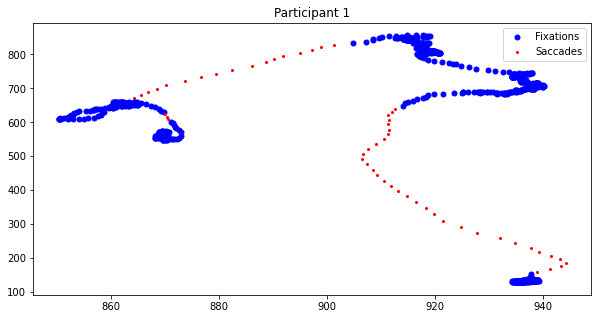

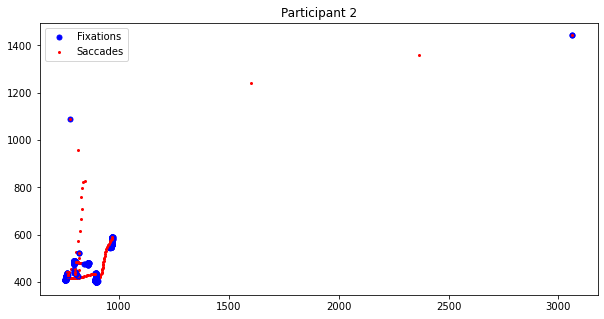

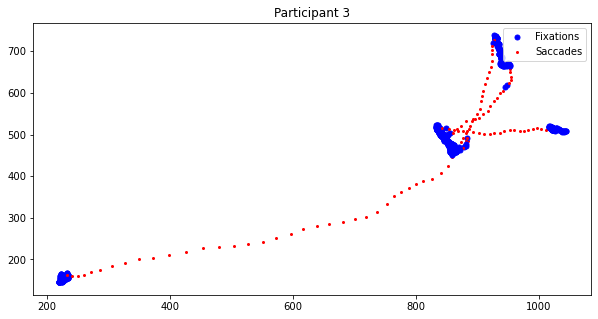

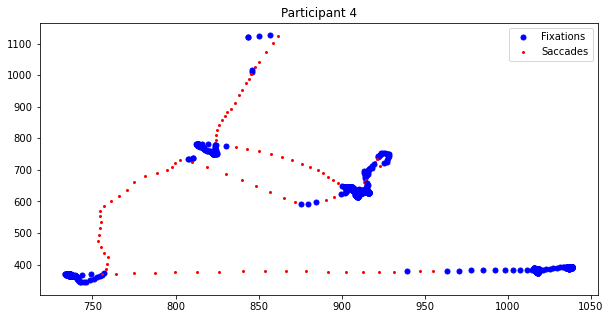

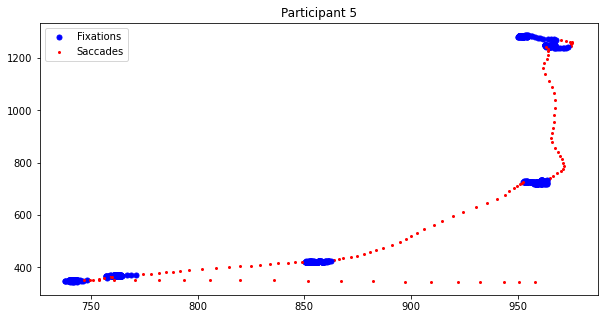

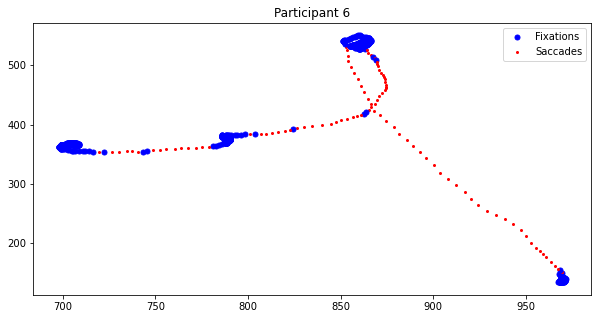

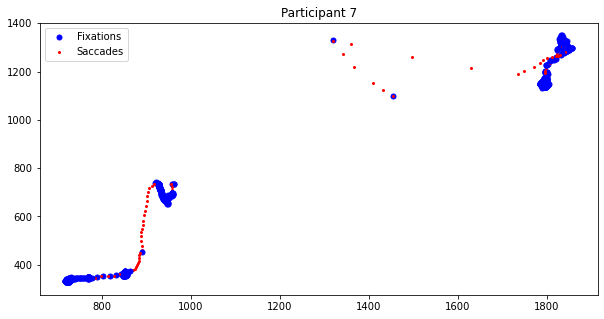

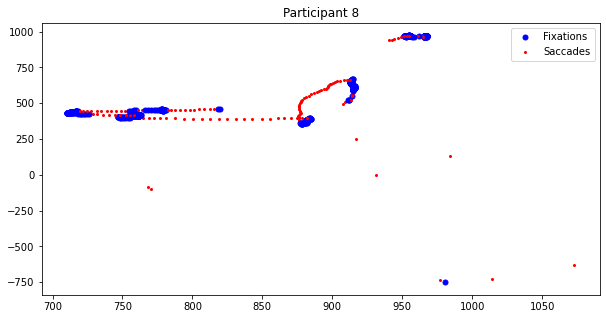

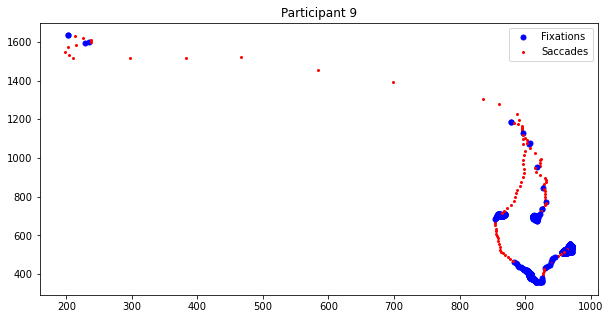

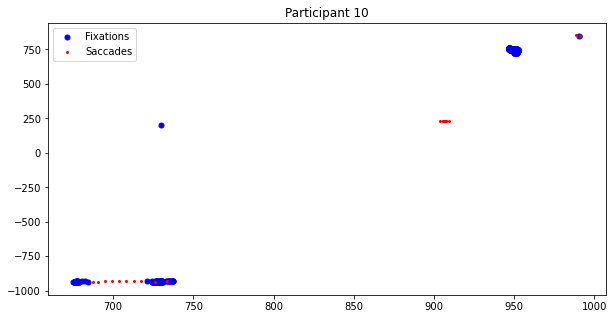

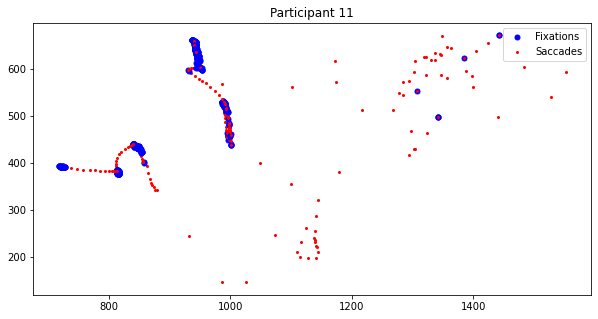

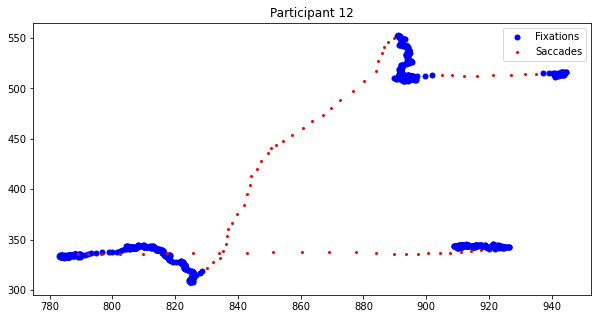

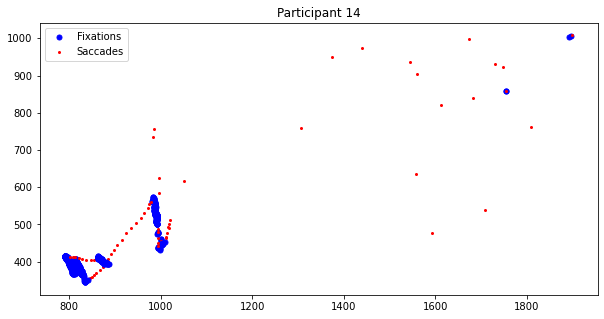

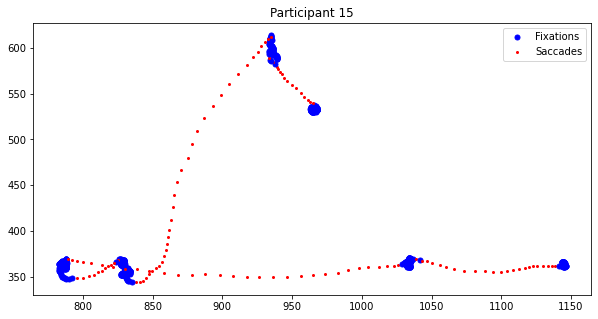

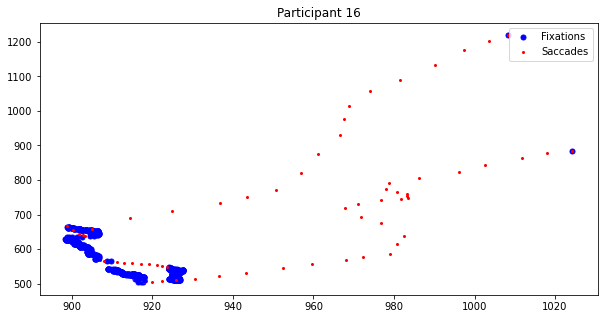

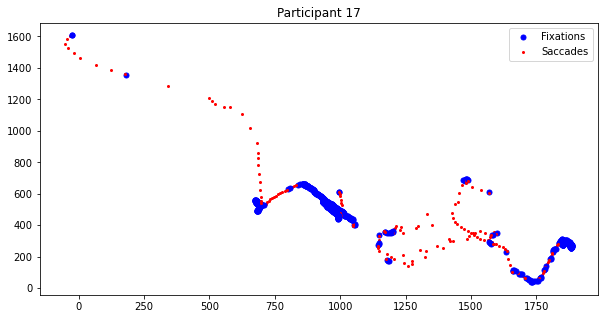

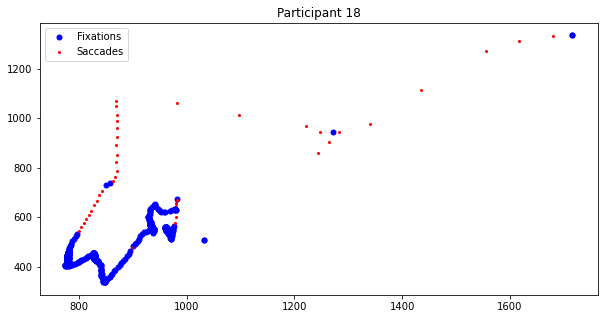

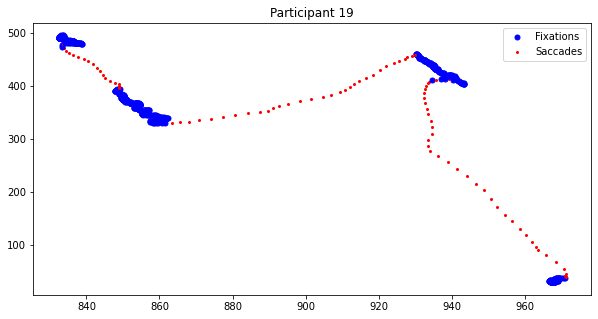

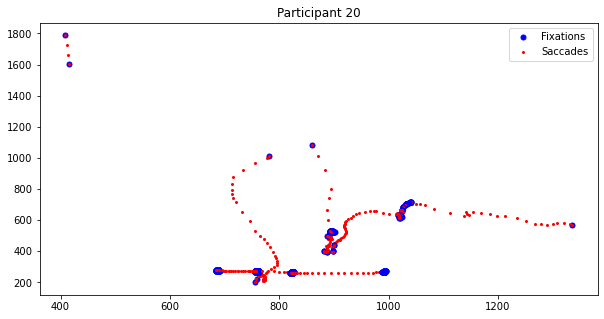

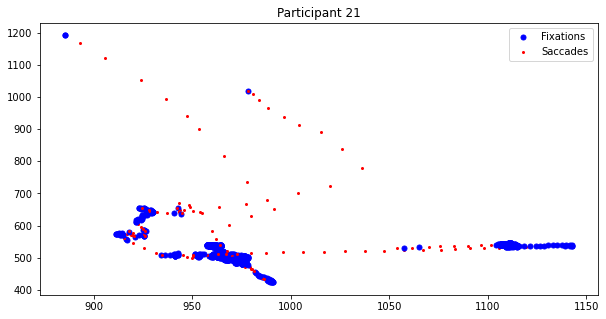

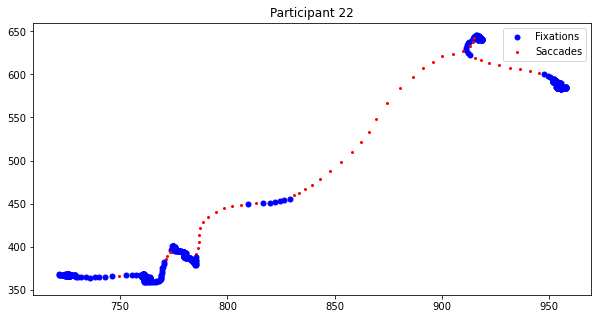

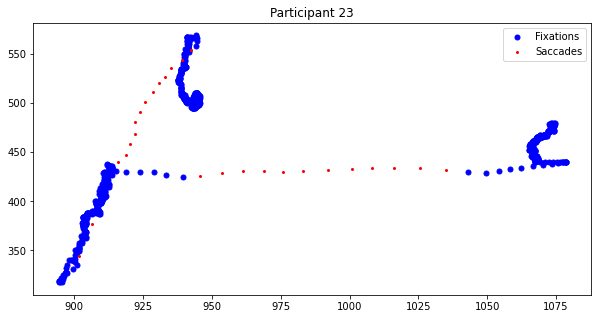

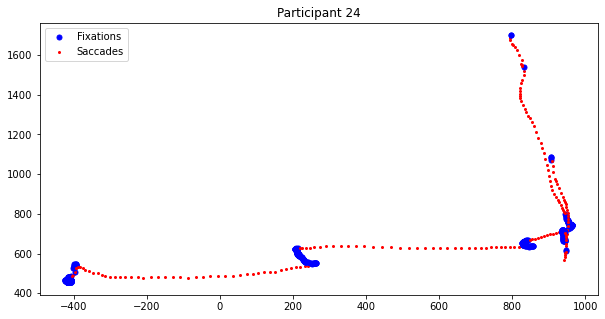

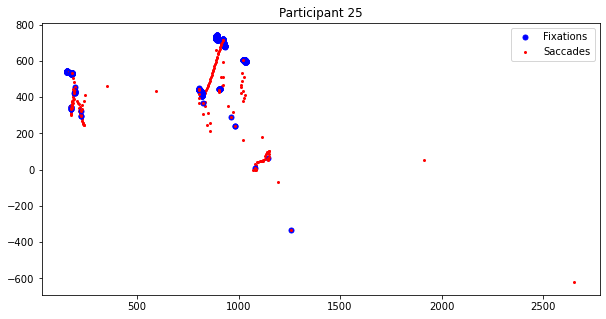

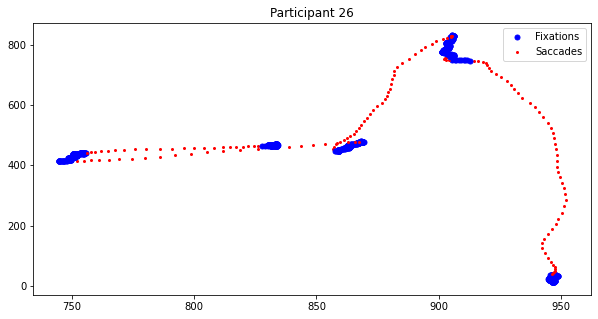

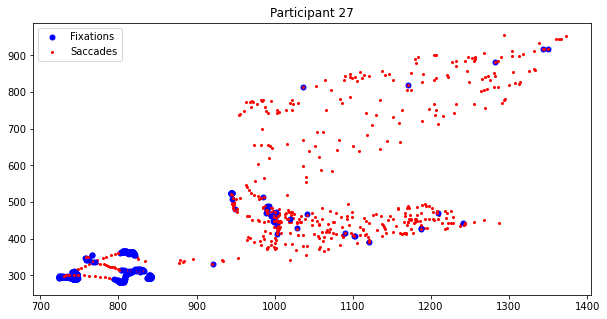

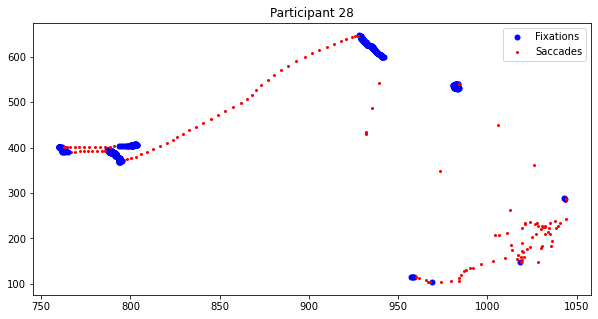

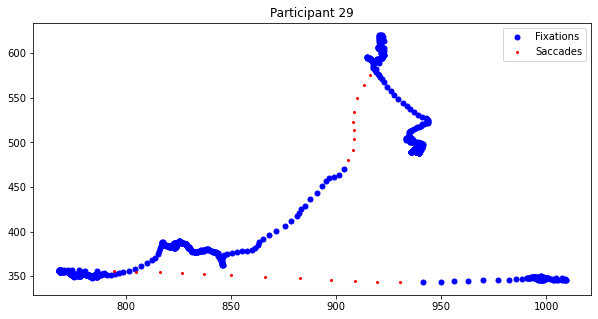

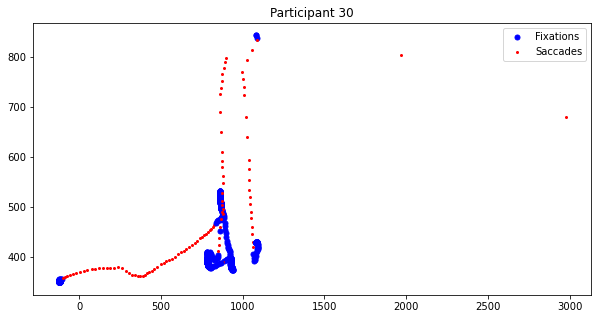

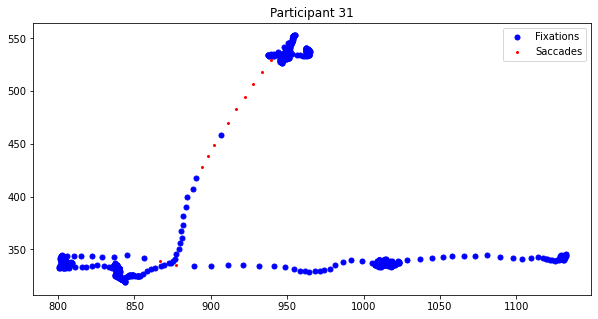

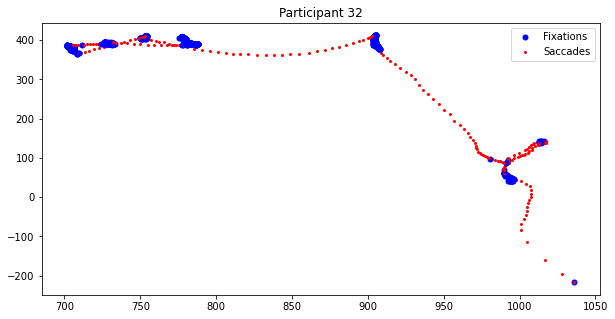

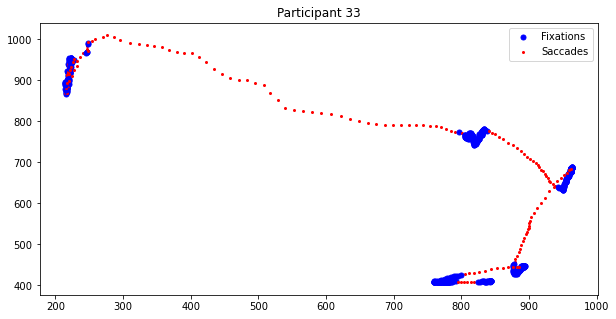

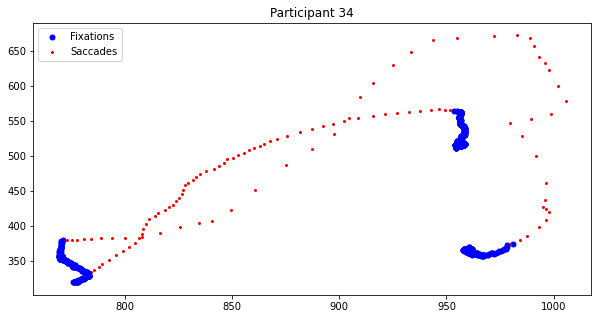

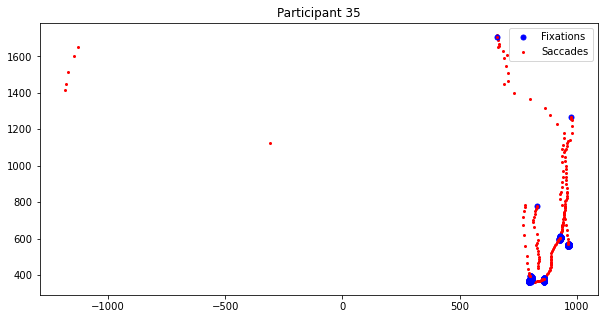

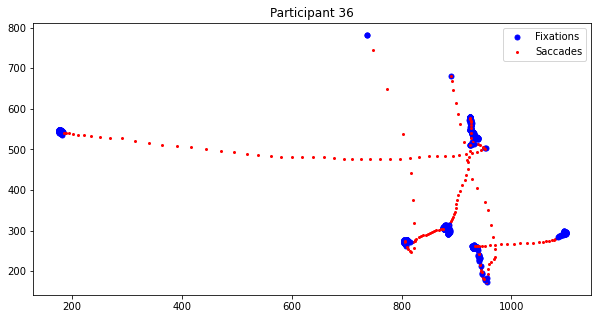

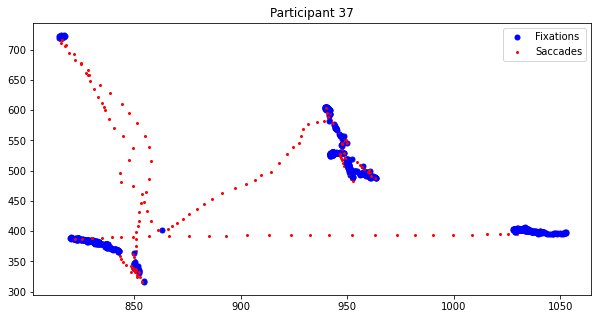

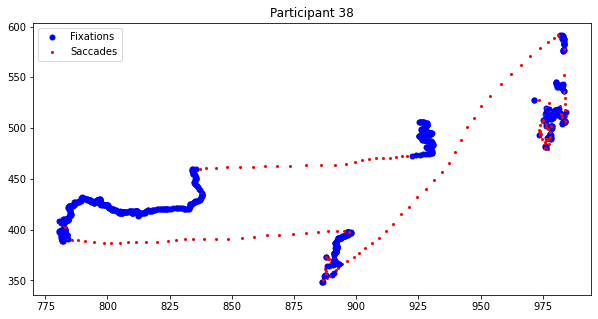

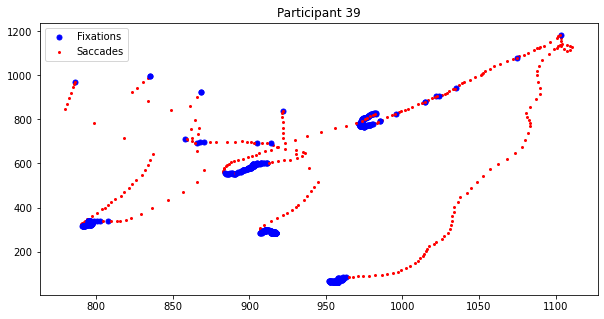

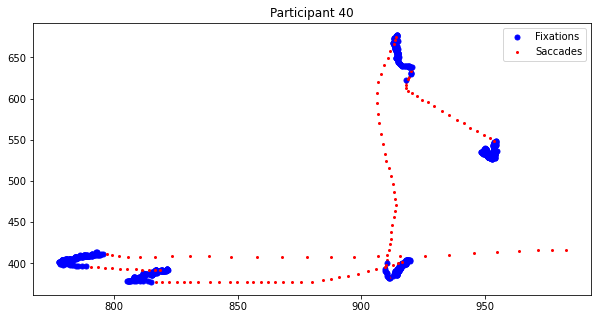

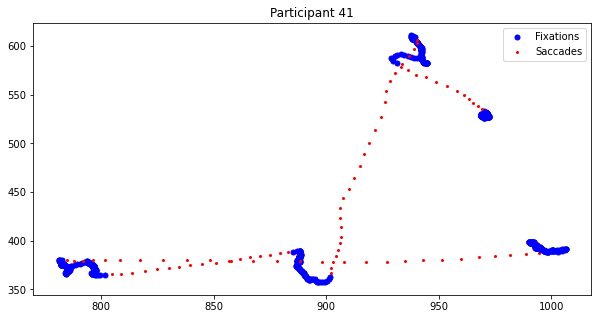

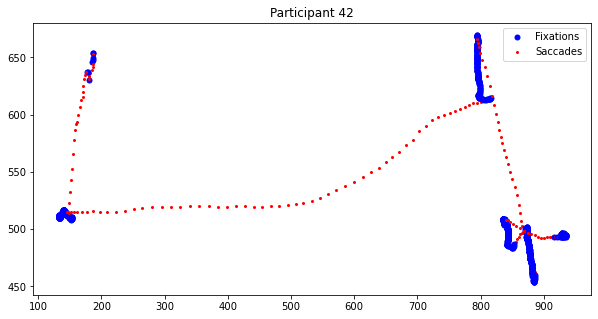

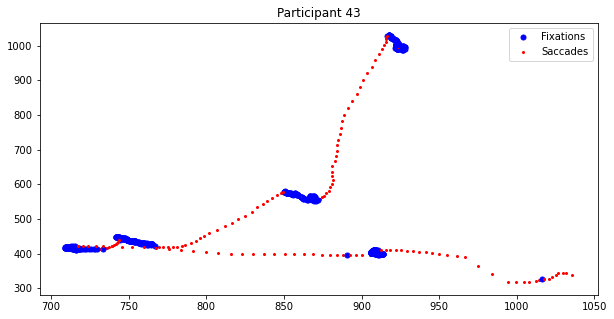

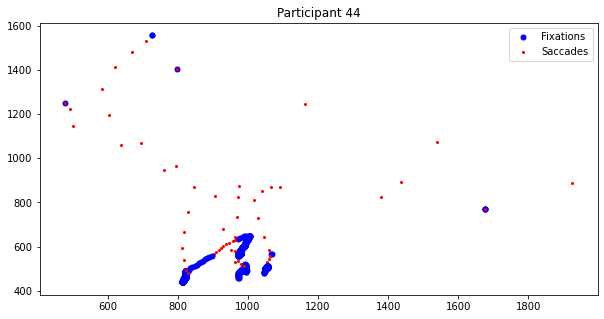

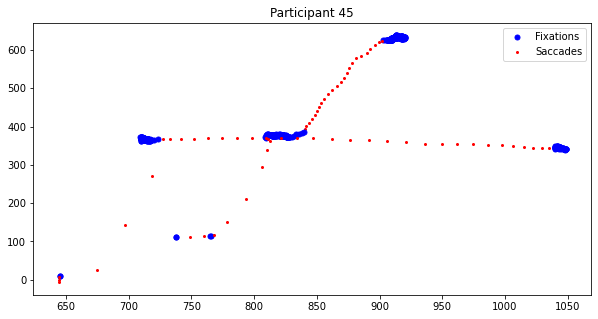

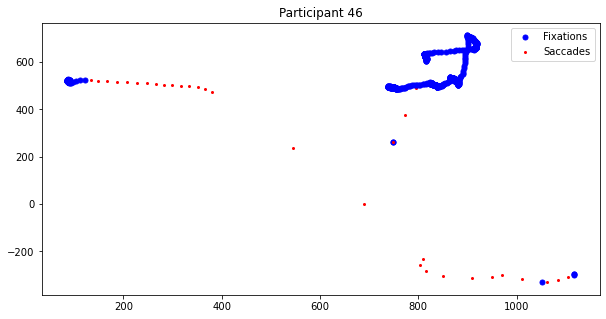

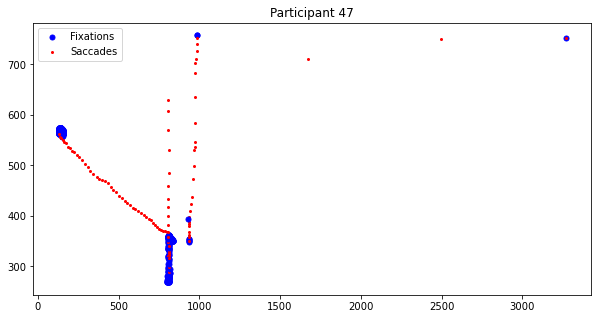

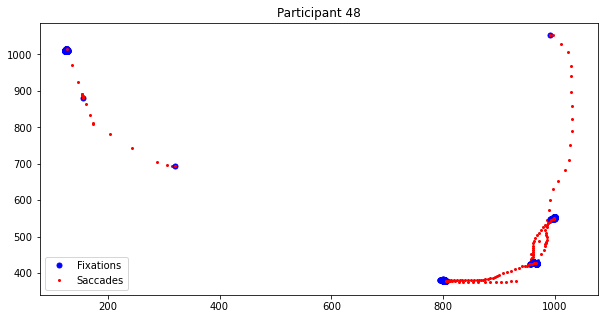

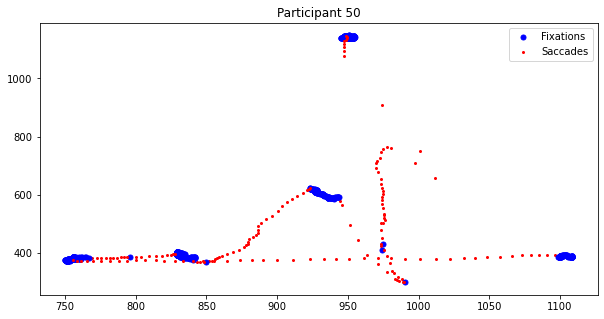

In [6]:
# Import additional libraries
import seaborn as sns

# Create a new dictionary to store saccades and fixations data
saccades_fixations = {}

# Iterate through the participant_numbers list
for i in participant_numbers:
    # Retrieve the corresponding threshold value from the threshold_table dataframe
    threshold = threshold_table.loc[threshold_table['Participant'] == int(i), 'Velocity Threshold'].values[0]

    # Identify the fixations and saccades based on the threshold value
    saccades = np.where(velocity_values['v' + i] > threshold)[0]
    fixations = np.where(velocity_values['v' + i] <= threshold)[0]

    # Store the saccades and fixations data in the dictionary
    saccades_fixations['participant' + i] = {'saccades': saccades, 'fixations': fixations}

# Plot the first 1000 points with different colors or markers to distinguish fixations and saccades
for i in participant_numbers:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title("Participant " + i)

    # Iterate through the first 1000 points
    for j in range(min(1000, len(x_values['x' + i]) - 1)):
        if j in saccades_fixations['participant' + i]['fixations']:
            # Plot fixations
            ax.plot(x_values['x' + i][j], y_values['y' + i][j], 'bo', markersize=5, label='Fixations')
        elif j in saccades_fixations['participant' + i]['saccades']:
            # Plot saccades
            ax.plot(x_values['x' + i][j], y_values['y' + i][j], 'ro', markersize=2, label='Saccades')

    # Create a custom legend to avoid duplicate labels
    custom_legend = [plt.Line2D([0], [0], color='b', marker='o', linestyle='', markersize=5, label='Fixations'),
                     plt.Line2D([0], [0], color='r', marker='o', linestyle='', markersize=2, label='Saccades')]
    ax.legend(handles=custom_legend)
    plt.show()


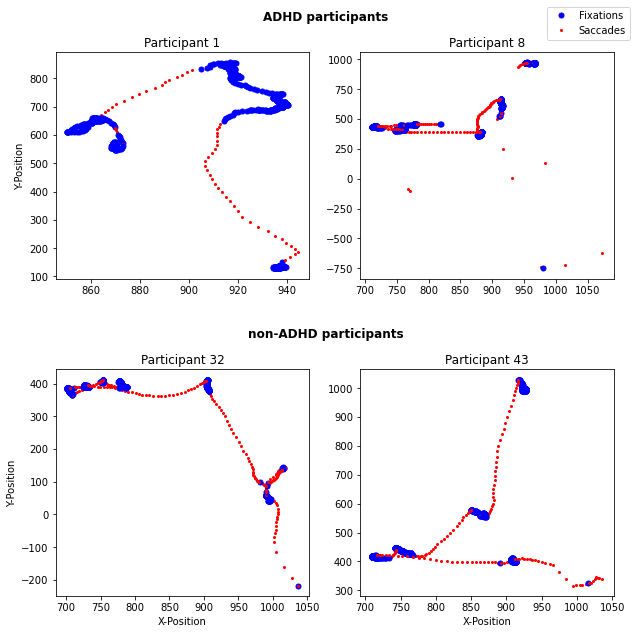

In [31]:
import re
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

adhd_participants = ['1', '8']
non_adhd_participants = ['32', '43']

for i, participant in enumerate(adhd_participants + non_adhd_participants):
    row = i // 2
    col = i % 2

    for j in range(min(1000, len(x_values['x' + participant]) - 1)):
        if j in saccades_fixations['participant' + participant]['fixations']:
            axs[row, col].plot(x_values['x' + participant][j], y_values['y' + participant][j], 'bo', markersize=5, label='Fixations')
        elif j in saccades_fixations['participant' + participant]['saccades']:
            axs[row, col].plot(x_values['x' + participant][j], y_values['y' + participant][j], 'ro', markersize=2, label='Saccades')

    axs[row, col].set_title(f'Participant {participant}')
    if col == 0:
        axs[row, col].set_ylabel('Y-Position')
    if row == 1:
        axs[row, col].set_xlabel('X-Position')

# Add titles for the top and bottom rows
fig.text(0.5, 0.92, "ADHD participants", fontsize=12, ha='center', va='bottom', fontweight='bold')
fig.text(0.5, 0.48, "non-ADHD participants", fontsize=12, ha='center', va='bottom', fontweight='bold')

# Increase the space between the rows
fig.subplots_adjust(hspace=0.4)

# Add a custom legend
custom_legend = [plt.Line2D([0], [0], color='b', marker='o', linestyle='', markersize=5, label='Fixations'),
                 plt.Line2D([0], [0], color='r', marker='o', linestyle='', markersize=2, label='Saccades')]
fig.legend(handles=custom_legend, loc='upper left', bbox_to_anchor=(0.8, 0.95))
#fig.legend(handles=custom_legend, loc='center right', bbox_to_anchor=(0.9, 0.95))

plt.savefig('scatter_plots.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
def saccade_stats(x, y, t, velocity, threshold):
    saccades = (velocity > threshold)
    saccade_count = 0
    saccade_amplitudes = []
    
    start_idx = 0
    in_saccade = False
    for i, is_saccade in enumerate(saccades):
        if is_saccade and not in_saccade:
            start_idx = i
            in_saccade = True
        elif not is_saccade and in_saccade:
            saccade_count += 1
            dx = x[i+1] - x[start_idx]
            dy = y[i+1] - y[start_idx]
            saccade_amplitude = np.sqrt(dx**2 + dy**2)
            saccade_amplitudes.append(saccade_amplitude)
            in_saccade = False
            
    if in_saccade:  # If the last point is part of a saccade
        saccade_count += 1
        dx = x[-1] - x[start_idx]
        dy = y[-1] - y[start_idx]
        saccade_amplitude = np.sqrt(dx**2 + dy**2)
        saccade_amplitudes.append(saccade_amplitude)
        
    total_time = t[-1] - t[0]
    saccade_freq = saccade_count / total_time*1000
    mean_saccade_amp = np.mean(saccade_amplitudes)
    
    return saccade_freq, mean_saccade_amp


def mean_fixation_duration(t, velocity, threshold):
    fixations = (velocity <= threshold)  # Create a Boolean array indicating fixation points
    fixation_count = 0
    fixation_durations = []  # Initialize a list to store durations of fixation sequences
    
    start_idx = 0
    in_fixation = False
    for i, is_fixation in enumerate(fixations):
        if is_fixation and not in_fixation:  # Start of a new fixation sequence
            start_idx = i  # Store the starting index of the fixation sequence
            in_fixation = True
        elif not is_fixation and in_fixation:  # End of the current fixation sequence
            fixation_count += 1
            fixation_duration = t[i] - t[start_idx]  # Calculate duration of the fixation sequence
            fixation_durations.append(fixation_duration)  # Append the duration to the list
            in_fixation = False  # Reset the in_fixation flag
            
    if in_fixation:  # If the last point is part of a fixation sequence
        fixation_count += 1
        fixation_duration = t[-1] - t[start_idx]  # Calculate duration of the last fixation sequence
        fixation_durations.append(fixation_duration)  # Append the duration to the list
        
    mean_fix_duration = np.mean(fixation_durations)/1000  # Calculate the mean of fixation durations
    
    return mean_fix_duration



In [ ]:
# Initialize the dataframe to store features
features_df = pd.DataFrame(columns=['Participant', 'Mean Velocity', 'Std Velocity', 'Saccade Frequency', 'Mean Saccade Amplitude', 'Mean Fixation Duration'])


for participant in participant_numbers:
    i = int(participant)
    threshold = threshold_table.loc[threshold_table['Participant'] == i, 'Velocity Threshold'].values[0]
    x = x_values['x{}'.format(i)]
    y = y_values['y{}'.format(i)]
    t = t_values['t{}'.format(i)]
    v = velocity_values['v{}'.format(i)]
    
    mean_velocity = np.mean(v)
    std_velocity = np.std(v)
    saccade_freq, mean_saccade_amp = saccade_stats(x, y, t, v, threshold)
    mean_fix_duration = mean_fixation_duration(t, v, threshold)
    
    features_df = features_df.append({'Participant': participant, 'Mean Velocity': mean_velocity, 'Std Velocity': std_velocity, 'Saccade Frequency': saccade_freq, 'Mean Saccade Amplitude': mean_saccade_amp, 'Mean Fixation Duration': mean_fix_duration}, ignore_index=True)


In [ ]:
features_df

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a column for target variable (ADHD=1, No ADHD=0)
features_df['ADHD'] = [1 if int(p) < i_start_no_adhd else 0 for p in features_df['Participant']]

X = features_df[['Mean Velocity', 'Std Velocity', 'Saccade Frequency', 'Mean Saccade Amplitude', 'Mean Fixation Duration']]
y = features_df['ADHD']

# Use Recursive Feature Elimination with Logistic Regression as the estimator
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=1)
selector = selector.fit(X, y)

# Print the ranking of features
print("Feature ranking:", selector.ranking_)


In [ ]:
def mean_fixation_duration_v2(t, velocity, threshold):
    binary_vector = (velocity > threshold).astype(int)

    change_indices = np.where(np.diff(binary_vector) != 0)[0] + 1

    if binary_vector[0] == 1:
        change_indices = np.insert(change_indices, 0, 0)
    if binary_vector[-1] == 1:
        change_indices = np.append(change_indices, len(binary_vector))

    fixation_durations = [t[end] - t[start] for start, end in zip(change_indices[::2], change_indices[1::2])]
    
    mean_fix_duration = np.mean(fixation_durations) / 1000
    
    return mean_fix_duration


In [ ]:
# Initialize an empty list to store the results
results = []

# Iterate over all participants
for participant in participant_numbers:
    # Check that the participant has non-empty velocity and timestamp arrays
    if not velocity_values[f'v{participant}'].any() or not t_values[f't{participant}'].any():
        continue

    # Get the optimal velocity threshold for the participant
    threshold = threshold_table.loc[threshold_table['Participant'] == int(participant), 'Velocity Threshold'].values[0]

    # Get the participant's velocity values
    participant_velocity_values = velocity_values[f'v{participant}']
    # Get the participant's timestamps
    participant_t_values = t_values[f't{participant}']

    # Calculate mean fixation duration using both functions
    mean_fix_duration_v1 = mean_fixation_duration(participant_t_values, participant_velocity_values, threshold)
    mean_fix_duration_v2 = mean_fixation_duration_v2(participant_t_values, participant_velocity_values, threshold)

    # Append the results to the list
    results.append([f'Participant {participant}', mean_fix_duration_v1, mean_fix_duration_v2])

# Create a DataFrame from the results
mean_fixation_durations_df = pd.DataFrame(results, columns=['Participant', 'Mean Fixation Duration (v1)', 'Mean Fixation Duration (v2)'])

print(mean_fixation_durations_df)
